# Building a Financial Trading Toolbox in Python: Simple Moving Average

Python, with its powerful data analysis package pandas, has taken the financial markets analysis world by storm. It enables researchers to perform sophisticated analysis that once required dedicated and expensive packages.

With this article, we are going to wade in the water of financial market analysis using Python and pandas. We will plot a market price series and add a basic indicator. With next articles, we will learn step by step how to swim by building a complete toolbox that can be used to create systems to trade stocks or other financial assets.

Most of the concepts that we are going to implement belong to a domain known as [Technical Analysis], a discipline that aims at evaluating investments and identify opportunities by analyzing data generated by trading activities, such as price and volume.

### Introducing the Moving Average

The **moving average** is one of the simplest technical indicators, yet it can be used and combined in many different ways to provide the backbone of trading systems and frameworks for investment decision making.

Moving averages, as all technical indicators, are based on the price series of a financial instrument. In our example we will consider the daily price series of the [SPDR S&P 500 ETF Trust] (symbol: SPY), an [Exchange Traded Fund] (ETF) traded on the NYSE Arca exchange. This ETF mimics the performance of the S&P 500 stock market index. We want to use moving averages to make investment decisions - to decide when to buy or sell shares in SPY.

There are actually several different kinds of moving averages. The three most commonly used are:
* Simple Moving Average
* Linearly Weighted Moving Average
* Exponentially Smoothed Moving Average

[Technical Analysis]: https://www.investopedia.com/terms/t/technicalanalysis.asp
[SPDR S&P 500 ETF Trust]: https://en.wikipedia.org/wiki/SPDR_S%26P_500_Trust_ETF
[Exchange Traded Fund]: https://www.investopedia.com/terms/e/etf.asp

The examples in this article will focus on the **Simple Moving Average (SMA)**. Its construction is quite simple: we first define a rolling window of length $n$ (a number of days in our example - let's use $n=5$). We then start from day 5 and consider all the prices from day 1 to day 5 (included). We compute the arithmetic mean of those prices (by summing them up and dividing by 5): that is the value of our SMA for day 5. Then, we move on to day 6, we take out the price on day 1, include the price on day 6 and compute the next SMA. We keep repeating the process until we reach the last price in our series. This table should make the process clearer:


| Date | Price | SMA 5 | Prices Included |
|:----:|:-----:|:-----:|:---------------:|
| 1    | 1     | NaN   | -               |
| 2    | 7     | NaN   | -               |
| 3    | 2     | NaN   | -               |
| 4    | 4     | NaN   | -               |
| 5    | 3     | 3.4   | 1, 7, 2, 4, 3     |
| 6    | 2     | 3.6   | 7, 2, 4, 3, 2     |
| 7    | 4     | 3.0   | 2, 4, 3, 2, 4     |
| 8    | 8     | 4.2   | 4, 3, 2, 4, 8     |
| 9    | 1     | 3.6   | 3, 2, 4, 8, 1     |
| 10   | 8     | 4.6   | 2, 4, 8, 1, 8     |

You have noticed that the first 4 values for our moving average are missing: until day 5 there are not enough days to fill a 5 day window.

### A visual example

Let us put this concept to work and create some practical examples using Python, [pandas] and [Matplotlib]. I am assuming that you have at least some basic Python knowledge and know what pandas DataFrame and Series objects are. If this is not the case, you can find a gentle introduction [here]. I also suggest that you use a [Jupyter] notebook to follow along with the following code. Here you can find a handy [Jupyter tutorial]. However, you always execute the code in your favourite way, through a script or interactive prompt. We start by loading the required libraries and checking their versions:

[here]: https://www.dataquest.io/course/python-for-data-science-fundamentals/
[pandas]: https://pandas.pydata.org/
[Matplotlib]: https://matplotlib.org/
[Jupyter]: https://jupyter.org/
[Jupyter tutorial]: https://www.dataquest.io/blog/jupyter-notebook-tutorial/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

print('Python version: ' + sys.version)
print('pandas version: ' + pd.__version__)
print('matplotlib version: ' + mpl.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
matplotlib version: 3.1.1


If you are using **Jupyter**, it's a good idea to display the chart within the notebook:

In [2]:
%matplotlib inline

If you are executing your in the prompt on through a script editor, you will need to add `plt.show()` to the code each time we are plotting a chart in order to make it visible.

Next, we load data into a DataFrame. I have obtained a CSV file of daily data for SPY from [Yahoo! Finance]. You can download [my csv file here]. 

[Yahoo! Finance]: https://uk.finance.yahoo.com/quote/SPY/history?p=SPY
[my csv file here]: https://raw.githubusercontent.com/stebas101/TradingToolbox/master/data/SPY.csv

In [18]:
datafile = 'data/SPY.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-08-20  198.119995  199.160004  198.080002  198.919998  180.141846   
2014-08-21  199.089996  199.759995  198.929993  199.500000  180.667160   
2014-08-22  199.339996  199.690002  198.740005  199.190002  180.386368   
2014-08-25  200.139999  200.589996  199.149994  200.199997  181.301010   
2014-08-26  200.330002  200.820007  200.279999  200.330002  181.418716   
...                ...         ...         ...         ...         ...   
2019-08-13  287.739990  294.149994  287.359985  292.549988  292.549988   
2019-08-14  288.070007  288.739990  283.760010  283.899994  283.899994   
2019-08-15  284.880005  285.640015  282.390015  284.649994  284.649994   
2019-08-16  286.480011  289.329987  284.709991  288.850006  288.850006   
2019-08-19  292.190002  293.079987  291.440002  292.329987  292.329987   

               Volume  
Date                   
2014-08-20   72763000  
2014-08-21   67791000  
2014-08-22   76107000  
2014-08-25   63855000  
2014-08-26   47298000  
...               ...  
2019-08-13   94299800  
2019-08-14  135622100  
2019-08-15   99556600  
2019-08-16   83018300  
2019-08-19   53571800  

[1258 rows x 6 columns]

Our data frame has six columns in total, one for Open, High, Low, Close, Adjusted Close prices and Volume respectively. To keep things simple, in our examples we will use only the Adjusted Close prices. That is the price series that reflects dividends, stock splits and other corporate events that affect stock returns.

In [5]:
close = data['Adj Close']
close.index = pd.to_datetime(close.index) # This converts the index to pandas datetime
close

Date
2014-08-20    180.141846
2014-08-21    180.667160
2014-08-22    180.386368
2014-08-25    181.301010
2014-08-26    181.418716
                 ...    
2019-08-13    292.549988
2019-08-14    283.899994
2019-08-15    284.649994
2019-08-16    288.850006
2019-08-19    292.329987
Name: Adj Close, Length: 1258, dtype: float64

We can easily plot the price series for visual inspection:

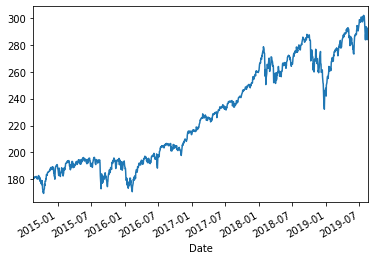

In [6]:
close.plot()

Pandas makes calculating a 50 day moving average easy. Using the __rolling()__ method we set a 50 day window, on which we calculate the arithmetic average (mean) using the __mean()__ method: 

In [7]:
sma50 = close.rolling(window=50).mean()
sma50

Date
2014-08-20           NaN
2014-08-21           NaN
2014-08-22           NaN
2014-08-25           NaN
2014-08-26           NaN
                 ...    
2019-08-13    293.540820
2019-08-14    293.635375
2019-08-15    293.696567
2019-08-16    293.805137
2019-08-19    293.926582
Name: Adj Close, Length: 1258, dtype: float64

As we expect, the first 49 values of the series are empty:

In [8]:
sma50.iloc[45:52]

Date
2014-10-23           NaN
2014-10-24           NaN
2014-10-27           NaN
2014-10-28           NaN
2014-10-29    178.725250
2014-10-30    178.750461
2014-10-31    178.806655
Name: Adj Close, dtype: float64

We can now plot our first moving average on a chart. To make our chart look nicer, we can use a predefined style:

In [9]:
plt.style.use('fivethirtyeight')

You can experiment with different styles, check out what is available [here].

We can now plot our chart:

[here]: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

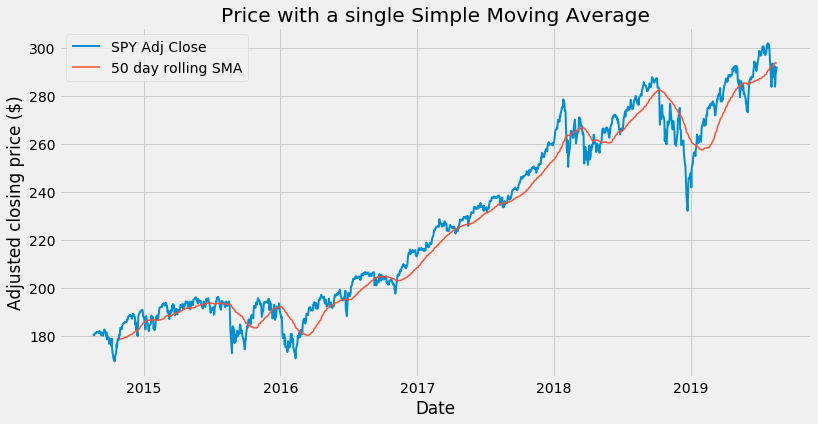

In [10]:
plt.figure(figsize = (12,6))
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()

If you’re **not using Jupyter**, you need to add the following line to make the plot visible:

`plt.show()`

Remember to do the same for each of the next plots.

### Use of one moving average

Used on its own, our simple moving average does a good job by smoothing the price movements and helping us to visually identify the trend: when the average line is climbing up, we have an uptrend. When the average points down, we are in a downtrend.

We can do more than that: it is possible to generate trading signals by using one single moving average. When the closing price moves above the moving average from below, we have a buy signal:

![buy signal](images/fig01.png)

Similarly, when the price crosses the moving average from above, a sell signal is generated.

![sell signal](images/fig02.png)

### Selecting date ranges

Let's compare  two moving averages with different length, 20 and 50 day respectively:

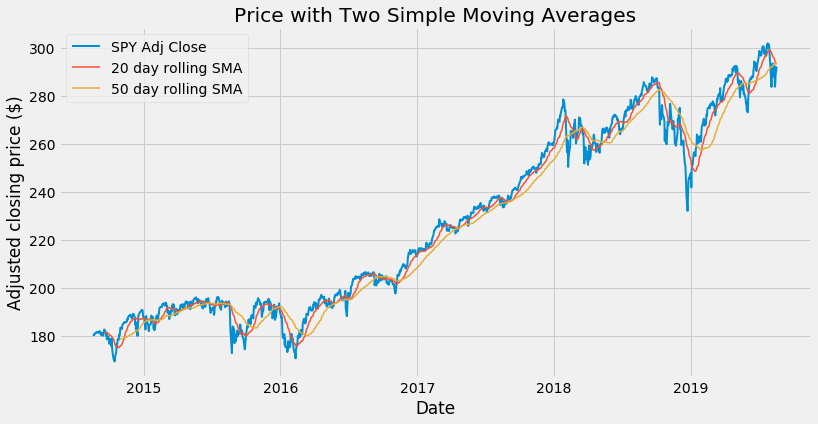

In [11]:
sma20 = close.rolling(window=20).mean()

plt.figure(figsize = (12,6))
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()

Our chart is now getting a bit crowded. It would be nice to be able to zoom on a date range of our choice. We could use a __plt.xlim()__ instruction (e.g. `plt.xlim('2017-01-01','2018-12-31')`: just try to add it to the code above). However, I want to explore a different route: building a new dataframe that includes price and moving averages:

In [12]:
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })

priceSma_df

Adj Close      SMA 20      SMA 50
Date                                          
2014-08-20  180.141846         NaN         NaN
2014-08-21  180.667160         NaN         NaN
2014-08-22  180.386368         NaN         NaN
2014-08-25  181.301010         NaN         NaN
2014-08-26  181.418716         NaN         NaN
...                ...         ...         ...
2019-08-13  292.549988  295.381998  293.540820
2019-08-14  283.899994  294.689998  293.635375
2019-08-15  284.649994  293.980998  293.696567
2019-08-16  288.850006  293.564998  293.805137
2019-08-19  292.329987  293.286497  293.926582

[1258 rows x 3 columns]

Having all of our series in a single dataframe makes it easy to create a snap plot:

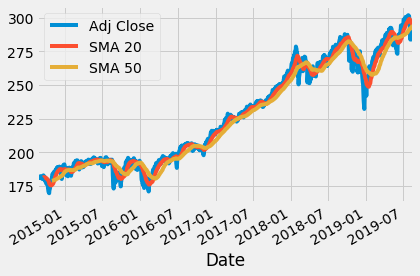

In [13]:
priceSma_df.plot()

With this method, however, I cannot easily select the line width: I will keep using a plot function call for each line. On this new data frame, we can easily select a **date range** (e.g. dates in 2017 and 2018, included) and plot only data within that range:

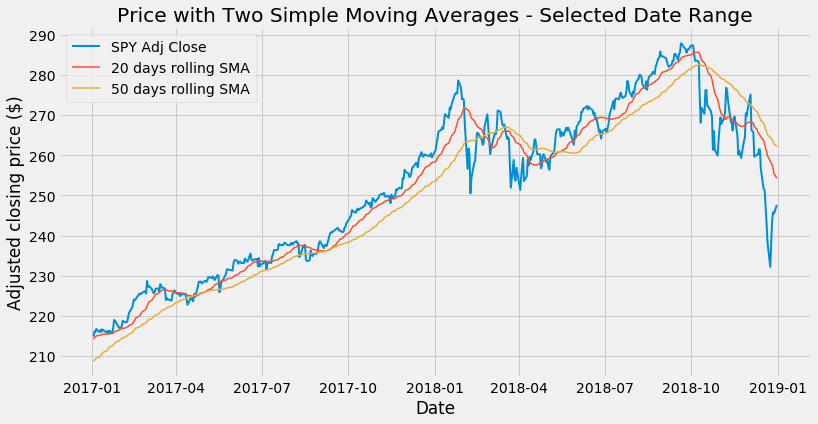

In [17]:
plt.figure(figsize = (12,6))
plt.plot(priceSma_df['2017':'2018']['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df['2017':'2018']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2018']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages - Selected Date Range')
plt.legend()

Slicing data by date range is one of the great features of pandas. All the following work:

- `priceSma_df['2017-04-01':'2017-06-15']`: range defined by two specific dates

- `priceSma_df['2017-01]` : prices in a given month

- `priceSma_df['2017]` : prices in a given year



### Use of two moving averages

By combining two moving averages, we can use a technique called *double crossover method*. With this setting, a buy signal is generated whenever the shorter moving average crosses the longer from below. Similarly, a sell signal is generated whenever the shorter moving average crosses the longer from above:

![Two MAs](images/fig03.png)

Compared with the technique that uses just one single moving average and the price, the double crossover method produces fewer whipsaws. On the other hand, it can generate signals with some delay.


### Use of three moving averages


If we can use two moving averages together, why not three then?

In [15]:
sma200 = close.rolling(window=200).mean()
priceSma_df['SMA 200'] = sma200
priceSma_df

Adj Close      SMA 20      SMA 50     SMA 200
Date                                                      
2014-08-20  180.141846         NaN         NaN         NaN
2014-08-21  180.667160         NaN         NaN         NaN
2014-08-22  180.386368         NaN         NaN         NaN
2014-08-25  181.301010         NaN         NaN         NaN
2014-08-26  181.418716         NaN         NaN         NaN
...                ...         ...         ...         ...
2019-08-13  292.549988  295.381998  293.540820  277.238597
2019-08-14  283.899994  294.689998  293.635375  277.327894
2019-08-15  284.649994  293.980998  293.696567  277.444337
2019-08-16  288.850006  293.564998  293.805137  277.589019
2019-08-19  292.329987  293.286497  293.926582  277.731843

[1258 rows x 4 columns]

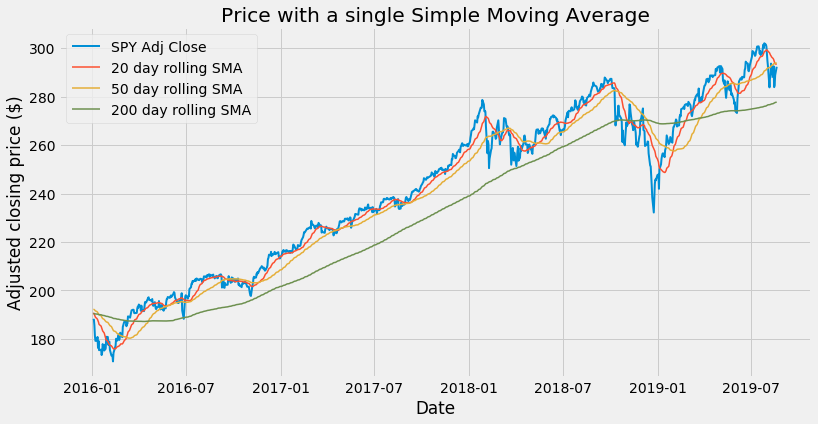

In [22]:
start = '2016'
end = '2019'

plt.figure(figsize = (12,6))
plt.plot(priceSma_df[start:end]['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df[start:end]['SMA 20'], label='20 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 50'], label='50 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 200'], label='200 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()

See how the long term 200 SMA helps us to identify the trend in a very smooth manner.

This brings us to the *triple crossover method*. The set of moving averages we have used, with length 20, 50 and 200 day respectively, is actually widely used among analysts. We can choose to consider a buy signal when the 20 SMA crosses the 50 SMA from below, but only when both averages are above the 200 SMA. All the buy crosses that occur below the 200 SMA will be disregarded.

![Three MAs](images/fig04.png)

The examples in this article are just some of the many possibilities that can be generated by combining price and moving averages of different length. Also, price and moving averages can be combined with other available [technical indicators] or indicators that we can create ourselves.
Python and pandas provide all the power and flexibility needed to research and build a profitable trading system.

[technical indicators]: https://school.stockcharts.com/doku.php?id=technical_indicators